# Data Analysis Project: Bike Sharing
**Aria Fikri N.S**

## Determine business questions

- How is the development of the number of bike sharing users in this dataset?
- Does working day affect the number bike sharing users?
- Do weather and season affect the number of bike sharing users?
- At what time is the bike sharing number at its highest?

## Import Packages/Library

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

path = r"Bike-sharing-dataset"

os.chdir(path)

## Data Wrangling

### Gathering Data

Assign the dataset with pandas.read_csv (The dataset is in CSV/Comma Separated Value format)

In [12]:
df_hourly = pd.read_csv("hour.csv")
df_daily = pd.read_csv("day.csv")

df_hourly.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
df_daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
From the dataset source
* Columns from the bike dataset consists of:
    * Instant (No. of data record)
    * dteday (date)
    * Season (Integer as seasons [1: Spring, 2: Summer, 3: Fall, 4: Winter
    * Year [0: 2011, 1: 2012]
    * mnth (Month of the year)
    * hr (Hour from 0 to 23)
    * Holiday (Marks holiday)
    * Weekday (Day of the week from 0 to 6)
    * Workingday (Marks workday. 1 for workday and 0 for weekend or holiday)
    * Weathersit (Signifies the weather
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + 
    * temnormalized temperature with a maximum value of 41)al)
    * atemNormalized apparent temperature with a maximum value of 50mal)
    * huNormalized humidity value with a maximum value of 100mal)
    * windspeeNormalized windspeed with a maximum value of 67mal)
    * casuaCasual usersual)
    * registereRegistered users)aft
      cnTotal of registered and casual users)xxx

### Assessing Data

#### Checking the dataframe using .info() method

In [14]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Check for duplicate data

In [17]:
df_daily.duplicated().sum()

0

In [18]:
df_hourly.duplicated().sum()

0

#### Use the .describe() method

In [20]:
df_daily.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [21]:
df_hourly.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### **Insight:**

- Dateday is an object data type (String)
- Non-null values for all columns have the same count in each dataframes. No need to impute any values
- There are no duplicates in both dataframes
- The 'instant' column does not offer any insight so it can be deleted
- In both dataframes, from the describe() table, the number of users recorded in casual, registered, and cnt columns depict a fluctuating condition. This is favorable for the analysis 

### Cleaning Data

#### Delete the 'instant' column

In [26]:
df_daily = df_daily.drop("instant", axis=1)
df_hourly = df_hourly.drop("instant", axis=1)

df_daily.head(3)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [27]:
df_hourly.head(3)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


#### Change dteday to datetime type

In [29]:
df_daily["dteday"] = pd.to_datetime(df_daily["dteday"], format="%Y-%m-%d")
df_hourly["dteday"] = pd.to_datetime(df_hourly["dteday"], format="%Y-%m-%d")

df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


In [30]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

## Exploratory Data Analysis (EDA)

### Explore Dataset bike sharing
In this step, the data is explored to answer questions at the beginning of this analysis

In [34]:
df_daily.corr(numeric_only=True)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.205445,-0.110651,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659


#### Check the spread/distribution of registered, casual, and cnt columns

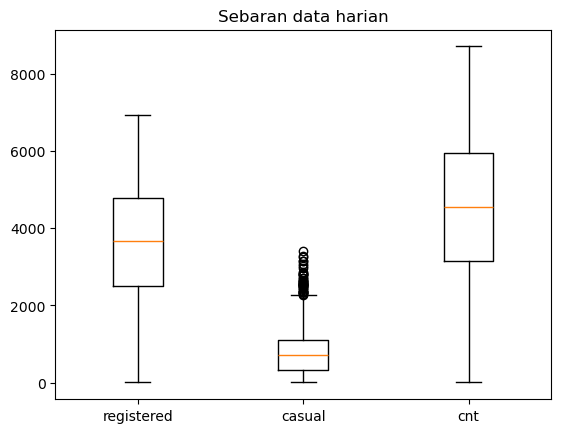

In [36]:
values = [df_daily["registered"], df_daily["casual"], df_daily["cnt"]]

plt.boxplot(values)
plt.xticks([1,2,3], ["registered", "casual", "cnt"])
plt.title("Sebaran data harian")

plt.show()

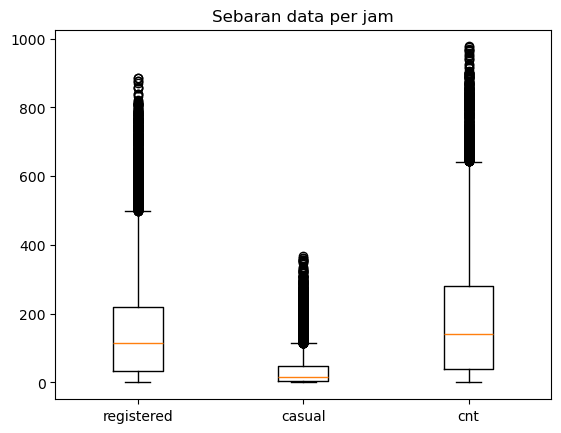

In [37]:
values = [df_hourly["registered"], df_hourly["casual"], df_hourly["cnt"]]

plt.boxplot(values)
plt.xticks([1,2,3], ["registered", "casual", "cnt"])
plt.title("Sebaran data per jam")

plt.show()

In [38]:
df_holiday = df_daily.groupby("holiday").agg({
    "casual": ["min", "max", "median"],
    "registered": ["min", "max", "median"],
    "cnt": ["min", "max", "median"],
})

df_holiday

casual              registered                 cnt              
           min   max median        min   max  median   min   max  median
holiday                                                                 
0            2  3410  711.5         20  6946  3691.0    22  8714  4558.0
1          117  3065  874.0        573  5172  2549.0  1000  7403  3351.0

In [39]:
df_daily.groupby("workingday").agg({
    "casual": ["min", "max", "median"],
    "registered": ["min", "max", "median"],
    "cnt": ["min", "max", "median"],
})

casual               registered                cnt              
              min   max  median        min   max  median  min   max  median
workingday                                                                 
0              54  3410  1338.0        451  5966  2928.0  605  8714  4459.0
1               2  2469   616.5         20  6946  3866.0   22  8362  4582.0

In [40]:
df_daily.groupby("weekday").agg({
    "casual": ["min", "max", "median"],
    "registered": ["min", "max", "median"],
    "cnt": ["min", "max", "median"],
})

casual               registered                 cnt              
           min   max  median        min   max  median   min   max  median
weekday                                                                  
0           54  3283  1353.0        451  5657  2874.0   605  8227  4334.0
1            2  3065   690.0         20  6435  3603.0    22  7525  4359.0
2            9  1348   542.5        573  6697  3943.0   683  7767  4576.5
3            9  2562   524.5        432  6946  4023.0   441  8173  4642.5
4           15  1405   570.0        416  6781  3949.5   431  7804  4721.0
5           38  2469   725.5       1129  6917  3835.5  1167  8362  4601.5
6           57  3410  1448.0        570  5966  3150.0   627  8714  4521.0

In [41]:
df_daily.groupby("yr").agg({
    "casual": ["min", "max", "median"],
    "registered": ["min", "max", "median"],
    "cnt": ["min", "max", "median"],
})

casual              registered                cnt              
      min   max median        min   max  median  min   max  median
yr                                                                
0       9  3065  614.0        416  4614  2915.0  431  6043  3740.0
1       2  3410  904.5         20  6946  4776.5   22  8714  5927.0

In [42]:
df_temp = df_daily.groupby(["yr", "mnth"], as_index=False).agg({
    "casual": ["min", "max", "median", "sum"],
    "registered": ["min", "max", "median", "sum"],
    "cnt": ["min", "max", "median", "sum"],
    "atemp": ["min", "max", "median"],
})

df_temp

yr mnth casual                      registered                         cnt  \
              min   max  median    sum        min   max  median     sum   min   
0   0    1      9   331    83.0   3073        416  1844  1137.0   35116   431   
1   0    2     47   694   139.5   6242        905  2348  1490.0   41973  1005   
2   0    3     46  1424   300.0  12826        491  2355  1699.0   51219   605   
3   0    4    121  1965   655.5  22346        674  3722  2482.5   72524   795   
4   0    5    255  2355   773.0  31050       2213  4238  3445.0  104771  2633   
5   0    6    513  1920   831.5  30612       2993  4488  3850.0  112900  3767   
6   0    7    562  3065   841.0  36452       2298  4220  3363.0  104889  3285   
7   0    8    226  1914   812.0  28842        889  4614  3695.0  107849  1115   
8   0    9    118  2521   690.5  26545       1689  4372  3530.5  100873  1842   
9   0   10     57  2397   637.0  25222        570  4267  3293.0   98289   627   
10  0   11     69  1275   393.0  15594        935  3891  2805.0   86573  1495   
11  0   12     50   706   227.0   8448        451  3672  2688.0   78875   705   
12  1    1     67  1070   217.0   8969       1234  4185  3040.0   87775  1301   
13  1    2     65  1435   229.0   8721       1456  4546  3571.0   94416  1529   
14  1    3    203  3155   838.0  31618       2339  5893  4571.0  133257  3194   
15  1    4    120  3252  1089.0  38456        907  5950  4704.0  135768  1027   
16  1    5    342  3410  1059.0  44235       2501  6433  4990.0  151630  2843   
17  1    6    477  2963  1077.0  43294       3594  6456  5332.0  159536  4127   
18  1    7    747  2562  1140.0  41705       3195  6790  5336.0  161902  4459   
19  1    8    935  2827  1233.0  43197       3341  6541  5917.0  171306  4549   
20  1    9    371  3160  1062.0  43778       3197  6946  6138.5  174795  4073   
21  1   10      2  3031   874.0  34538         20  6911  5791.0  164303    22   
22  1   11    123  2290   475.0  21009       1470  5520  4815.5  131655  2277   
23  1   12      9  1153   364.0  13245        432  6055  4240.0  110468   441   

                             atemp                      
     max  median     sum       min       max    median  
0   1985  1248.0   38189  0.079070  0.363625  0.208839  
1   2927  1629.0   48215  0.144283  0.511983  0.279761  
2   3239  2077.0   64045  0.200133  0.527009  0.318178  
3   5312  3226.5   94870  0.283454  0.594083  0.452006  
4   5805  4451.0  135821  0.404650  0.725383  0.532833  
5   5515  4839.5  143512  0.587133  0.757579  0.643319  
6   6043  4541.0  141341  0.624371  0.840896  0.696338  
7   5895  4602.0  136691  0.594704  0.724121  0.651521  
8   5423  4584.5  127418  0.461475  0.665429  0.573574  
9   5511  4304.0  123511  0.227913  0.551804  0.472858  
10  4486  3631.0  102167  0.272721  0.524612  0.402131  
11  3940  3068.0   87323  0.245579  0.456400  0.317542  
12  4521  3243.0   96744  0.119337  0.415383  0.275254  
13  5062  3777.0  103137  0.101658  0.466538  0.309346  
14  8362  5382.0  164875  0.241171  0.570067  0.459592  
15  7460  6214.5  174224  0.301125  0.614925  0.454838  
16  8294  6421.0  195865  0.491783  0.679300  0.577021  
17  8120  6988.0  202830  0.525892  0.786613  0.617750  
18  8173  6685.0  203607  0.549912  0.804913  0.702038  
19  7865  7148.0  214503  0.242400  0.751267  0.654688  
20  8714  7514.5  218573  0.502513  0.708983  0.579241  
21  8156  7282.0  198841  0.309909  0.607975  0.503142  
22  6852  5319.0  152664  0.248742  0.475383  0.333642  
23  6606  4649.0  123713  0.220333  0.469054  0.316904

In [43]:
df_monthly = df_daily.groupby(["yr", "mnth"], as_index=False).agg({
    "casual": ["min", "max", "median", "sum"],
    "registered": ["min", "max", "median", "sum"],
    "cnt": ["min", "max", "median", "sum"],
})

df_monthly

yr mnth casual                      registered                         cnt  \
              min   max  median    sum        min   max  median     sum   min   
0   0    1      9   331    83.0   3073        416  1844  1137.0   35116   431   
1   0    2     47   694   139.5   6242        905  2348  1490.0   41973  1005   
2   0    3     46  1424   300.0  12826        491  2355  1699.0   51219   605   
3   0    4    121  1965   655.5  22346        674  3722  2482.5   72524   795   
4   0    5    255  2355   773.0  31050       2213  4238  3445.0  104771  2633   
5   0    6    513  1920   831.5  30612       2993  4488  3850.0  112900  3767   
6   0    7    562  3065   841.0  36452       2298  4220  3363.0  104889  3285   
7   0    8    226  1914   812.0  28842        889  4614  3695.0  107849  1115   
8   0    9    118  2521   690.5  26545       1689  4372  3530.5  100873  1842   
9   0   10     57  2397   637.0  25222        570  4267  3293.0   98289   627   
10  0   11     69  1275   393.0  15594        935  3891  2805.0   86573  1495   
11  0   12     50   706   227.0   8448        451  3672  2688.0   78875   705   
12  1    1     67  1070   217.0   8969       1234  4185  3040.0   87775  1301   
13  1    2     65  1435   229.0   8721       1456  4546  3571.0   94416  1529   
14  1    3    203  3155   838.0  31618       2339  5893  4571.0  133257  3194   
15  1    4    120  3252  1089.0  38456        907  5950  4704.0  135768  1027   
16  1    5    342  3410  1059.0  44235       2501  6433  4990.0  151630  2843   
17  1    6    477  2963  1077.0  43294       3594  6456  5332.0  159536  4127   
18  1    7    747  2562  1140.0  41705       3195  6790  5336.0  161902  4459   
19  1    8    935  2827  1233.0  43197       3341  6541  5917.0  171306  4549   
20  1    9    371  3160  1062.0  43778       3197  6946  6138.5  174795  4073   
21  1   10      2  3031   874.0  34538         20  6911  5791.0  164303    22   
22  1   11    123  2290   475.0  21009       1470  5520  4815.5  131655  2277   
23  1   12      9  1153   364.0  13245        432  6055  4240.0  110468   441   

                          
     max  median     sum  
0   1985  1248.0   38189  
1   2927  1629.0   48215  
2   3239  2077.0   64045  
3   5312  3226.5   94870  
4   5805  4451.0  135821  
5   5515  4839.5  143512  
6   6043  4541.0  141341  
7   5895  4602.0  136691  
8   5423  4584.5  127418  
9   5511  4304.0  123511  
10  4486  3631.0  102167  
11  3940  3068.0   87323  
12  4521  3243.0   96744  
13  5062  3777.0  103137  
14  8362  5382.0  164875  
15  7460  6214.5  174224  
16  8294  6421.0  195865  
17  8120  6988.0  202830  
18  8173  6685.0  203607  
19  7865  7148.0  214503  
20  8714  7514.5  218573  
21  8156  7282.0  198841  
22  6852  5319.0  152664  
23  6606  4649.0  123713

**Insight:**
- The hourly dataset has more outliers in its user count. This signifies that there are busy schedules for the bike sharing facility both in the casual and the registered users.
- Daily dataset has outliers in the casual user count which is a sign that the number of casual users are more fluctuative. This is possibly because of holidays and weekends.
- The bike sharing user count in the holiday row has an 'inverted' amount between casual and registered. Casual users are higher in holidays but registered users are higher in workdays but lower in holidays. This depicts user behavior.
- Median value can be used to depict the 'middle point' of the data more accurately and minimize the effect of outliers.
- The 2011 data (0 in the year column) has a lower min value but the median in casual and registered columns are higher in 2012 (1 in the year column) which means that the bike sharing user number had an increment.
- In the correlation table, only a few have strong correlations with each other (>= 0.8). Temperature has a relatively high correlation compared to other columns.

## Visualization & Explanatory Analysis

### Question 1:

How is the development of the number of bike sharing users in this dataset?

Creating the chart to answer this question is done by using pyplot's plot method. The month is on the X axis and user count is on the Y

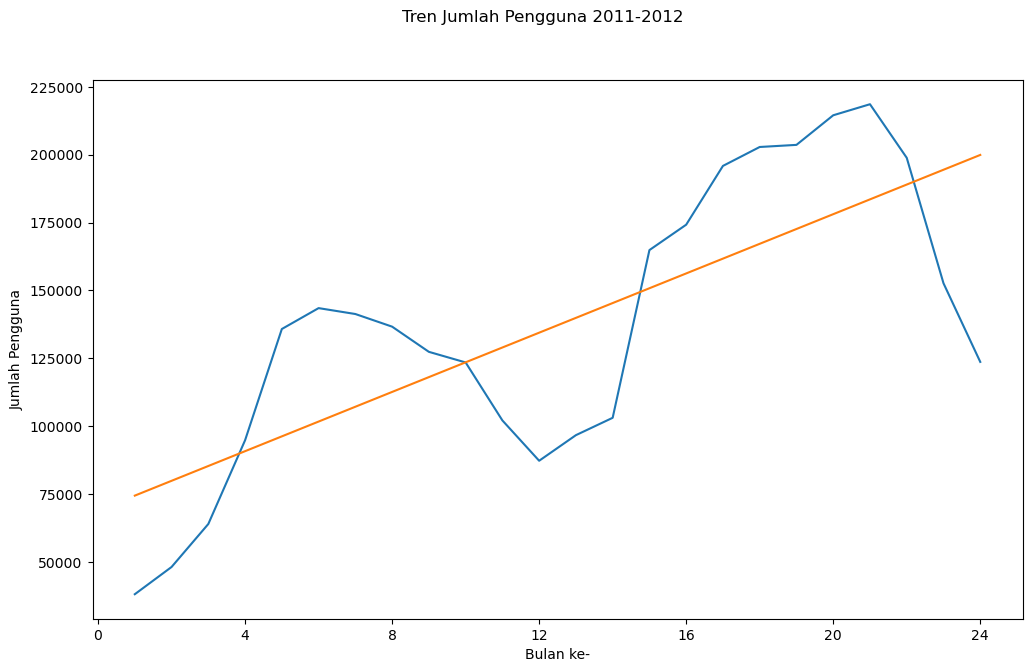

In [49]:
df_month = df_monthly.copy()

df_month["mnth"] = [x+1 for x in df_month.index]

fig, ax = plt.subplots(figsize=[12,7])
tick = np.arange(0,25,4)
plt.suptitle("Tren Jumlah Pengguna 2011-2012")

z = np.polyfit(df_month["mnth"], df_month["cnt"]["sum"], 1)
p = np.poly1d(z)
plt.plot(df_month["mnth"], df_month["cnt"]["sum"])
plt.plot(df_month["mnth"], p(df_month["mnth"]))
plt.xticks(tick)
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Bulan ke-")


plt.show()

**Explanation**: In this chart, the user count ("Jumlah pengguna") has a trendline that rises steadily from the first month recorded ("Bulan ke-") to the last. In addition to that, the peak and lowest user count in both years follow the same trend that is low in the beginning and end of year and peaks at the middle of the year.

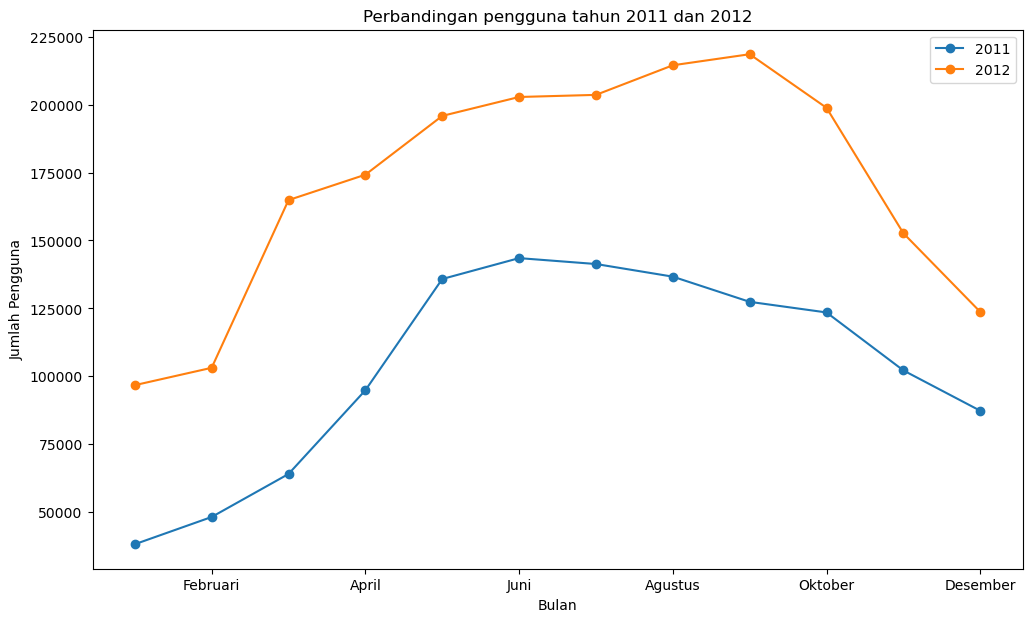

In [52]:
df_first_year = df_monthly.iloc[0:12, :]
df_second_year = df_monthly.iloc[12:24, :]

fig, ax = plt.subplots(figsize=[12,7])
ticks = np.arange(2, 13, 2)

plt.plot(df_first_year["mnth"], df_first_year["cnt"]["sum"], marker='o', label="2011")
plt.plot(df_second_year["mnth"], df_second_year["cnt"]["sum"], marker='o', label="2012")
plt.legend()
plt.ylabel("Jumlah Pengguna")
plt.xlabel("Bulan")
plt.xticks(ticks=ticks, labels=["Februari", "April", "Juni", "Agustus", "Oktober", "Desember"])
plt.title("Perbandingan pengguna tahun 2011 dan 2012")

plt.show()

This chart was made with pyplot.plot method. The month of the recorded data is on the x axis and the number of users is on the y axis.Orange color is for 2012 and blue is for 2011

**Explanation**: In this second chart, the difference between user number in 2011 and 2012 is more clearly depicted. User number in 2011 starts at less than 50000 but in 2012 the user number starts at a bit less than 100000. The rise, starting from February to June, and the fall, starting from October all the way to December is also more visible.

### Question 2:

Does working day affect bike sharing user number?

To answer the second question, first we need to create a new dataframe differentiating between working day and non-working day. Next, to create the chart, we use the barplot from seaborn. First chart is used to show comparison between registered and casual user numbers between working and non working day. The second chart shows total user number (registered + casual) in working plus non working day.

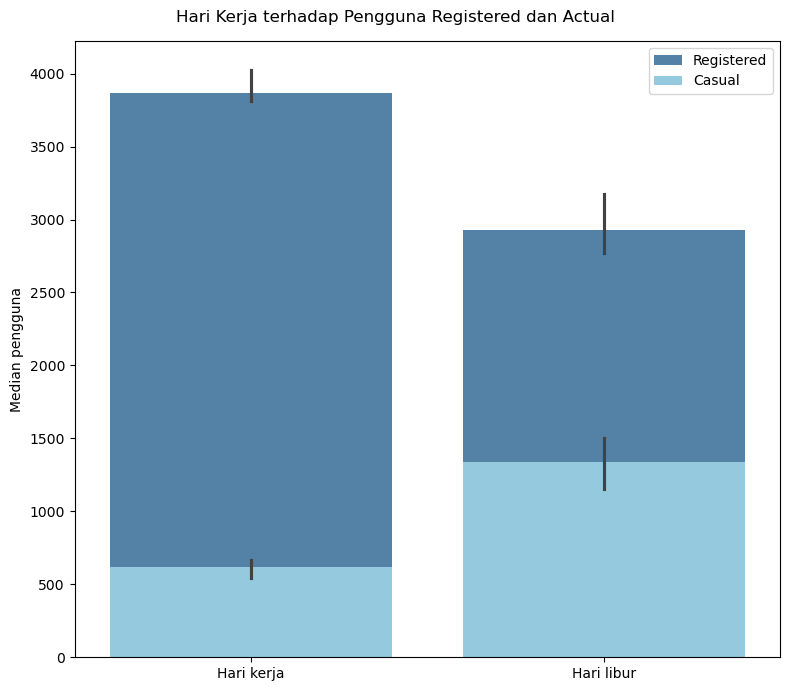

In [57]:
df_working = df_daily.loc[(df_daily["workingday"] == 1) & (df_daily["holiday"] == 0)]
df_non_working = df_daily.loc[df_daily["workingday"] == 0]

fig, ax = plt.subplots(figsize=[8,7])
plt.suptitle("Hari Kerja terhadap Pengguna Registered dan Actual")
est = "median"

color = {
    "registered": "steelblue",
    "casual": "skyblue"
}

sns.barplot(data=df_working, x=df_working["workingday"], y=df_working["registered"], color=color["registered"], label="Registered", estimator=est)
sns.barplot(data=df_non_working, x=df_non_working["workingday"], y=df_non_working["registered"], color=color["registered"], estimator=est)

sns.barplot(data=df_working, x=df_working["workingday"], y=df_working["casual"], color=color["casual"], label="Casual", estimator=est)
sns.barplot(data=df_non_working, x=df_non_working["workingday"], y=df_non_working["casual"], color=color["casual"], estimator=est)

plt.xticks([0,1], ["Hari kerja", "Hari libur"])
plt.ylabel("Median pengguna")
plt.xlabel("")

plt.tight_layout()
plt.show()

**Explanation**: This barplot shows the number of bike sharing users from both the registered and casual segment. As also answered in the previous question, as a whole, the number of casual users are relatively lower than registered users. Furthermore, the number of registered users is higher in workday which is the inverse of casual users which has a higher number in holidays.

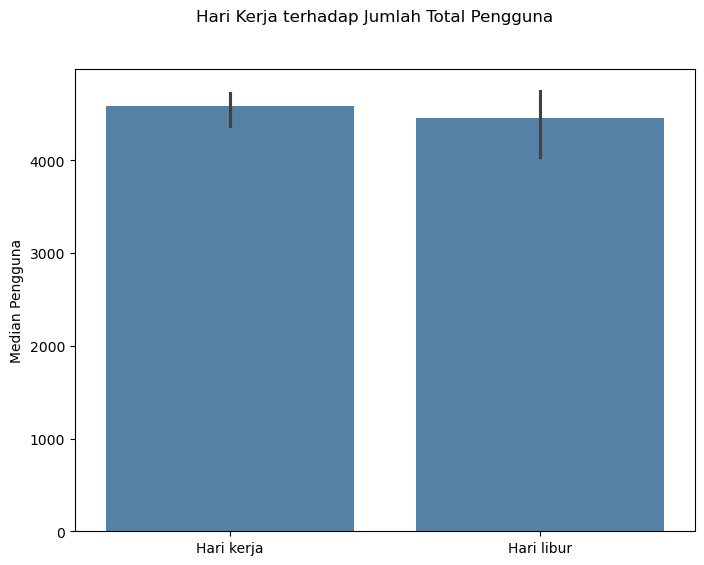

In [59]:
fig, ax = plt.subplots(figsize=[8,6])
plt.suptitle("Hari Kerja terhadap Jumlah Total Pengguna")

sns.barplot(data=df_working, x=df_working["workingday"], y=df_working["cnt"], color=color["registered"], estimator=est)
sns.barplot(data=df_non_working, x=df_non_working["workingday"], y=df_non_working["cnt"], color=color["registered"], estimator=est)

plt.ylabel("Median Pengguna")
plt.xlabel("")
plt.xticks([0,1], ["Hari kerja", "Hari libur"])

plt.show()

**Explanation**: This second barplot shows that the total number of registered and casual users in both workday and non-working day has a similar median

### Question 3:

Do weather and season affect the number of bike sharing users?

In [63]:
df_season = df_daily.groupby("season").agg({
    "casual": ["min", "max", "median"],
    "registered": ["min", "max", "median"],
    "cnt": ["min", "max", "median"]
})

df_season

casual               registered                 cnt              
          min   max  median        min   max  median   min   max  median
season                                                                  
1           9  3155   218.0        416  5315  1867.0   431  7836  2209.0
2         120  3410   867.0        674  6456  3844.0   795  8362  4941.5
3         118  3160  1050.5        889  6917  4110.5  1115  8714  5353.5
4           2  3031   544.5         20  6946  3815.0    22  8555  4634.5

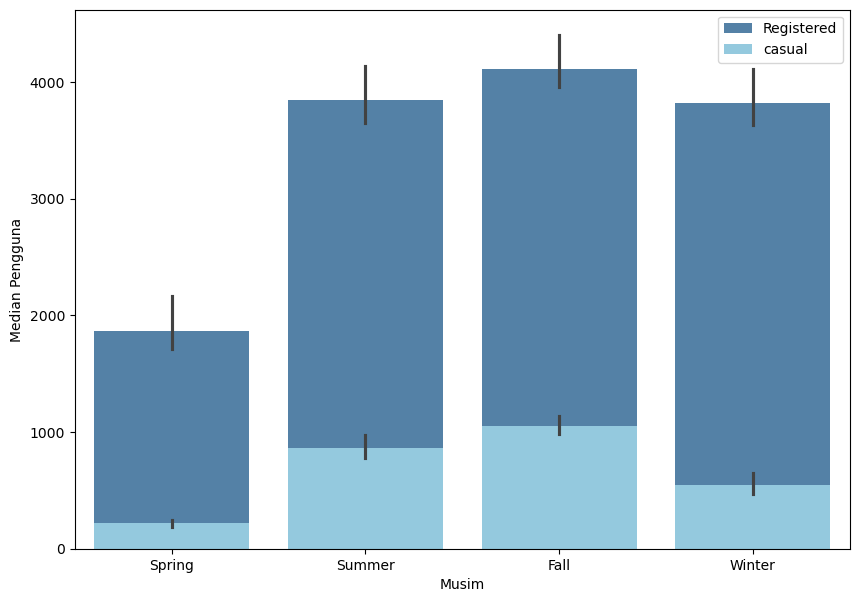

In [64]:
fig, ax = plt.subplots(figsize=[10,7])

color = {
    "registered": "steelblue",
    "casual": "skyblue"
}

sns.barplot(data=df_daily, x="season", y=df_daily["registered"], label="Registered", color=color["registered"], estimator="median")
sns.barplot(data=df_daily, x="season", y=df_daily["casual"], label="casual", color=color["casual"], estimator="median")

plt.ylabel("Median Pengguna")
plt.xlabel("Musim")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])

plt.show()

**Explanation**: To create this chart, we have to first create an aggregated dataframe grouped by the season. The median of registered and casual users is higher in summer and fall with winter following closely but it is low in spring. This number correlates with the answer for the first question where the graph shows that the number of users tend to be lower in the early and late months of the year and its peak is in summer/fall months.

In [65]:
df_weather = df_hourly.groupby("weathersit", as_index=False).agg({
    "casual": ["min", "max", "median"],
    "registered": ["min", "max", "median"],
    "cnt": ["min", "max", "median"]
})

df_weather

weathersit casual             registered             cnt            
                min  max median        min  max median min  max median
0          1      0  367   20.0          0  886  128.0   1  977  159.0
1          2      0  350   15.0          0  822  111.0   1  957  133.0
2          3      0  263    5.0          0  791   55.0   1  891   63.0
3          4      1    6    1.0         22  158   35.0  23  164   36.0

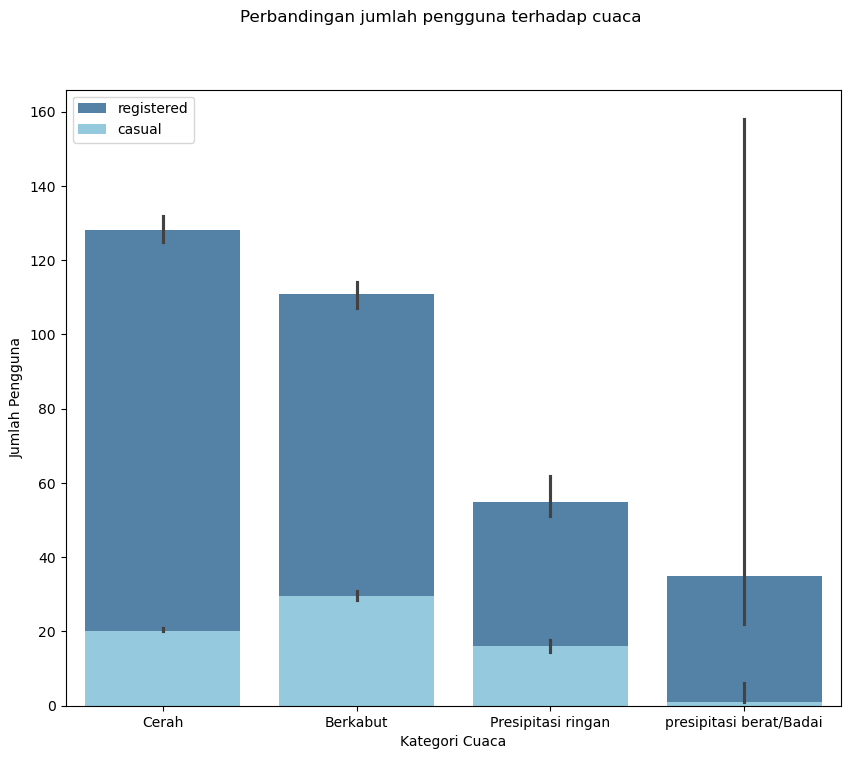

In [66]:
df_weather_1 = df_hourly.loc[df_hourly["weathersit"] == 1]
df_weather_2 = df_hourly.loc[df_hourly["weathersit"] == 2]
df_weather_3 = df_hourly.loc[df_hourly["weathersit"] == 3]
df_weather_4 = df_hourly.loc[df_hourly["weathersit"] == 4]

fig, ax = plt.subplots(figsize=[10, 8])
plt.suptitle("Perbandingan jumlah pengguna terhadap cuaca")

color = {
    "registered": "steelblue",
    "casual": "skyblue"
}

sns.barplot(data=df_weather_1, x="weathersit", y=df_weather_1["registered"], label="registered", color=color["registered"], estimator="median")
sns.barplot(data=df_weather_2, x="weathersit", y=df_weather_2["registered"], color=color["registered"], estimator="median")
sns.barplot(data=df_weather_3, x="weathersit", y=df_weather_3["registered"], color=color["registered"], estimator="median")
sns.barplot(data=df_weather_4, x="weathersit", y=df_weather_4["registered"], color=color["registered"], estimator="median")


sns.barplot(data=df_weather_1, x="weathersit", y=df_weather_1["casual"], label="casual", color=color["casual"], estimator="median")
sns.barplot(data=df_weather_2, x="weathersit", y=df_weather_2["casual"], color=color["casual"])
sns.barplot(data=df_weather_3, x="weathersit", y=df_weather_3["casual"], color=color["casual"])
sns.barplot(data=df_weather_4, x="weathersit", y=df_weather_4["casual"], color=color["casual"], estimator="median")

plt.ylabel("Jumlah Pengguna")
plt.xticks([0, 1, 2, 3], ["Cerah", "Berkabut", "Presipitasi ringan", "presipitasi berat/Badai"])
plt.xlabel("Kategori Cuaca")


plt.show()

**Explanation**: Same as in the first chart, we have to create a new aggregated dataframe but for this chart it is grouped by weather condition. As shown in the chart, the highest median number of total users is recorded in clear weather conditions followed by mist. Inversely, conditions where there's light precipitation or even heavy precipitation/storm is recorded as having low number of users. *The heavy precipitation category has a big error bar because of the low number of recorded heavy precipitation events.

### Question 4:

At what time is the bike sharing number at its highest

For question number 4 we need to make another aggregated dataframe grouped by the hour or 'hr' column

In [71]:
df_hour_group = df_hourly.groupby("hr", as_index=False).agg({
    "casual": ["min", "max", "median"],
    "registered": ["min", "max", "median"],
    "cnt": ["min", "max", "median"]
})

df_hour_group.head()

hr casual            registered             cnt            
        min max median        min  max median min  max median
0  0      0  68    7.0          0  234   32.0   2  283   40.0
1  1      0  49    4.0          0  139   15.0   1  168   20.0
2  2      0  44    2.0          0  104    8.0   1  132   11.0
3  3      0  26    1.0          0   61    5.0   1   79    6.0
4  4      0  13    1.0          0   22    5.0   1   28    6.0

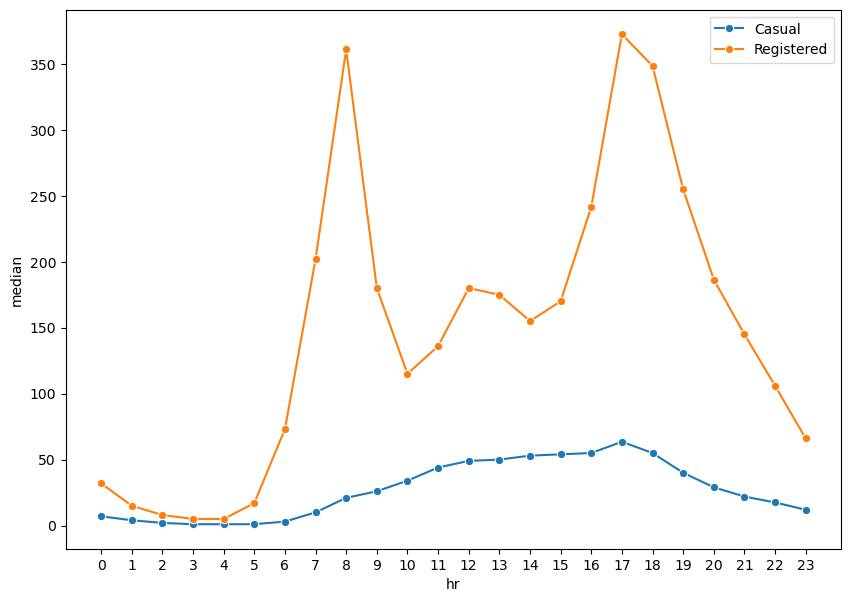

In [72]:
fig, ax = plt.subplots(figsize=[10,7])
ticks = np.arange(0,24,1)

sns.lineplot(data= df_hour_group, x="hr", y=df_hour_group["casual"]["median"], marker='o', label="Casual")
sns.lineplot(data= df_hour_group, x="hr", y=df_hour_group["registered"]["median"], marker='o', label="Registered")

plt.legend()
plt.xticks(ticks=ticks)

plt.show()

**Overall Insight:**

- The number of bike sharing users from 2011 to 2012 has a rising trend as shown in the first and second question.
- Working day and non-working day affects the number of bike sharing users from both the registered and casual segments. Registered users has a higher number in work days while the casual users are higher in holidays but the total (registered + casual) number of users does not differ too much in working day and non-working day
- The effect of season towards the number of users is shown in the charts of the third question. Users number is lowest in spring while it rises in summer and fall. In winter, the numbers go back down although not too much. This conclusion is in line with the chart from the first question which shows that user number are lowest in early and late months.
- For the third question, the weather conditions is grouped by number with 1 being clear weather and 4 being a heavy precipitation. In the chart, user number is visibly higher in clear weather and progressively gets lower as the weather number category increases.
- The chart in the 4th question shows that casual and registered users likely have different use for bike sharing. Registered users more likely use the bike sharing for commute to work because it spikes at 7 and progressively gets lower to 9 and then peaks again at 16 to 18 which are generally the time for office workers to commute to and from work. Meanwhile the casual users number does not have any visible huge spikes as in the registered user number but is generally higher in the afternoon.

## Additional Analysis

In this additional analysis, we will investigate the effect of temperature and its effect on the number of users. Additionally, the result will be binned using pandas' cut method to determine which temperature (apparent temperature) is optimal for users of bike sharing.

### Step 1

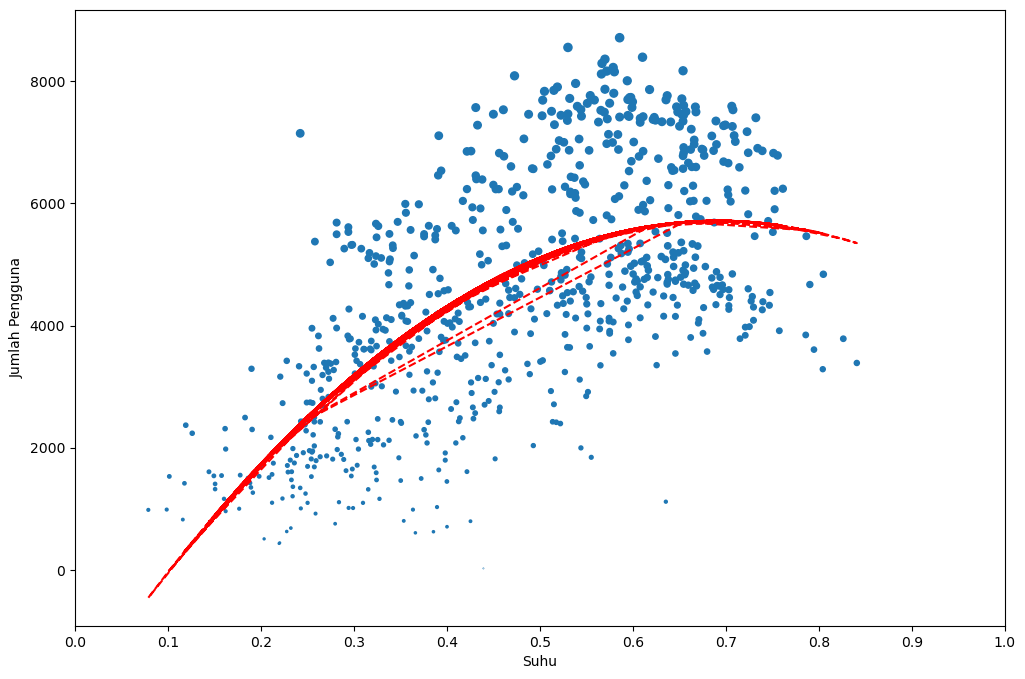

In [77]:
fig, ax = plt.subplots(figsize=[12,8])
ticks = np.arange(0, 1.1, 0.1)

# Scatter plot
plt.scatter(y=df_daily["cnt"], x=df_daily["atemp"], s=df_daily["cnt"]/250)

# Trend line
z = np.polyfit(df_daily["atemp"], df_daily["cnt"], 2)
p = np.poly1d(z)
plt.plot(df_daily["atemp"], p(df_daily["atemp"]), "r--")

plt.xlabel("Suhu")
plt.ylabel("Jumlah Pengguna")
plt.xticks(ticks=ticks)

plt.show()

### Step 2

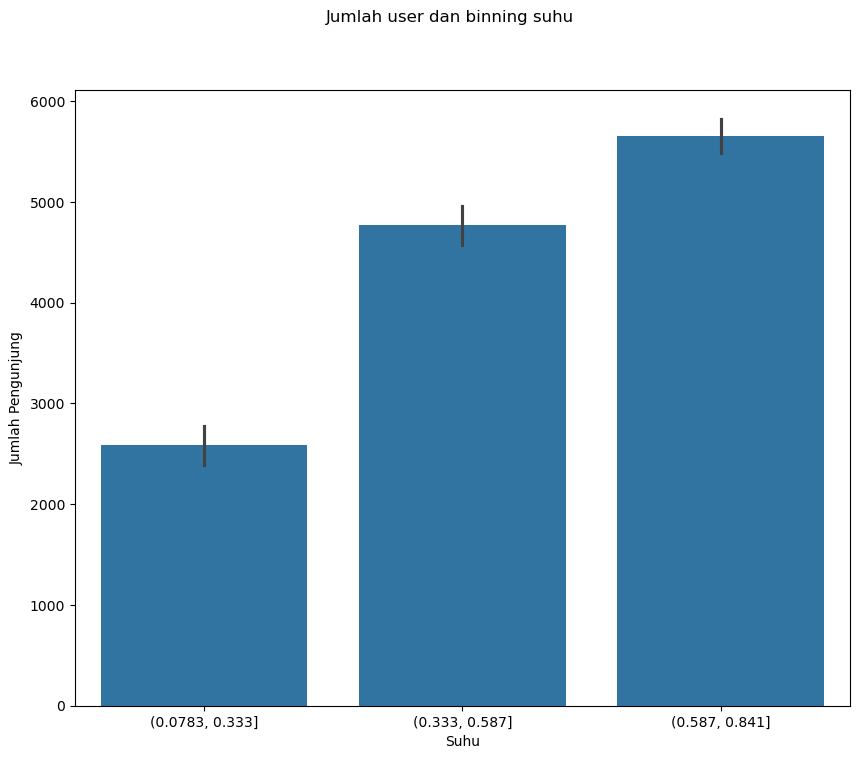

In [79]:
df_bin = df_daily.copy()
df_bin["atemp"] = pd.cut(df_bin["atemp"], 3)

fig, ax = plt.subplots(figsize=[10,8])
plt.suptitle("Jumlah user dan binning suhu")

sns.barplot(data=df_bin, x="atemp", y=df_bin["cnt"])
plt.ylabel("Jumlah Pengunjung")
plt.xlabel("Suhu")

plt.show()

### Step 3

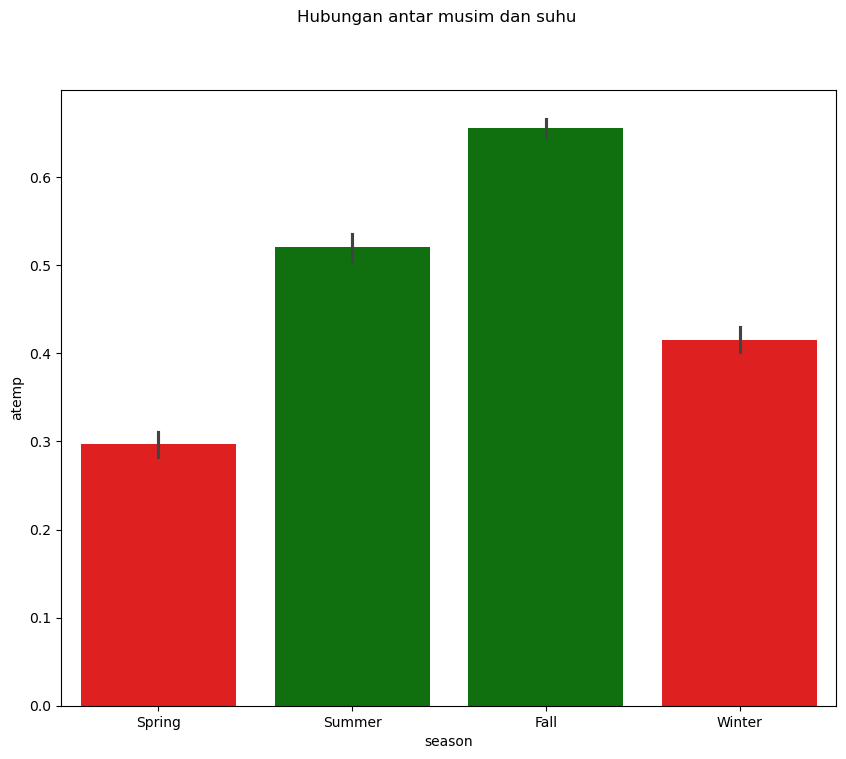

In [81]:
fig, ax = plt.subplots(figsize=[10,8])
plt.suptitle("Hubungan antar musim dan suhu")
palette=["red", "green", "green", "red"]

sns.barplot(data=df_daily, x="season", y=df_daily["atemp"], hue="season", palette=palette)
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])

plt.legend().remove()

plt.show()

In [82]:
df_spring = df_daily.loc[df_daily["season"] == 1, "mnth"].unique()
df_summer = df_daily.loc[df_daily["season"] == 2, "mnth"].unique()
df_fall = df_daily.loc[df_daily["season"] == 3, "mnth"].unique()
df_winter = df_daily.loc[df_daily["season"] == 4, "mnth"].unique()
all = [df_spring, df_summer, df_fall, df_winter]

for x in np.arange(0, len(all)):
    print(f"Season {x+1} berada di bulan ke {all[x]}")

Season 1 berada di bulan ke [ 1  2  3 12]
Season 2 berada di bulan ke [3 4 5 6]
Season 3 berada di bulan ke [6 7 8 9]
Season 4 berada di bulan ke [ 9 10 11 12]


**Insight:**
- The scatter plot shows that with increasing temperature, the count of users also increases until a certain point then it has a downward trend. Most recorded apparent temperature  is between 0.1 to 0.6. The trend line in the plot has a few strand lines which may signify effect of outliers but it still shows the upward trend until an optimum point.
- In the second step, we used pandas' cut to bin the temperature data. The cut method divides data into bins according to its value. The temperature value in the third bin has the highest number of user with a range of 0.58 to 0.84 for its normalized temperature.
- In the last step, we identify which seasons has the highest temperature and then identify in which months those seasons fall into. From the result, we can see that fall has the highest temperature followed by summer which falls into the third month all the way to the ninth month.

## Conclusion

t?
How is the development of the number of bike sharing users in this dataset?et The number of users had increase from 2011 to 2012 as shown by the chart and trend line.ren
Does working day affect the number bike sharing users?g*) *Working  affects the two segment (regular and casual) differentlyedRegistered users has higher number in working day and casual users has higher number in non working day.bur
Do weather and season affect the number of bike sharing users?g Weather and season factors into the number of users. The lowest number is recorded in the first season, continually rising to the third season then falls. In weather, category 1 has the highest user number but continuously drops until category 4. 4.
At what time is the bike sharing number at its highest?g Registered bike sharing user has the highest number at 8am and 5pm. This, paired with the result from question 2 tells us that registered users are likely workers who commute to and from work. Meanwhile the casual users has no noticeable peaks in the chart unlike regular users but the highest is in 5pm.re In the additional analysis, we found that temperature affects the number of users. The higher temperature (normalized to 51 max) records high number of users up until a certain point. The drop in user number due to higher temperature is not fully evident in the data because of its low count of data. Furthermore, we divided the data using pandas' bin to further assist temperature and user number prediction.na.